In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)
%matplotlib inline

In [3]:
from google.colab import files

# Upload kaggle.json (your API key file)
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
!kaggle datasets download -d anseldsouza/water-pump-sensor-data

 99% 8.00M/8.07M [00:01<00:00, 12.7MB/s]
100% 8.07M/8.07M [00:01<00:00, 7.84MB/s]


In [9]:
import zipfile
import os

# Specify the path to the zip file
zip_file_path = '/content/water-pump-sensor-data.zip'

# Specify the destination folder where you want to unzip the contents
extracted_folder_path = '/content/water-pump-sensor-data'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# List the contents of the extracted folder
os.listdir(extracted_folder_path)

['water_pump_sensor_data_with_rul.csv']

In [11]:
df= pd.read_csv('/content/water-pump-sensor-data/water_pump_sensor_data_with_rul.csv')
df.shape

(44807, 52)

In [12]:
df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,rul
0,18-04-2018 0:33,0.930642,0.601562,0.631878,0.591623,0.248264,0.624360,0.136304,0.645616,0.568709,0.553820,0.341385,0.317992,0.432041,0.199130,0.830355,0.627228,0.790621,0.549302,0.760030,0.889126,0.773518,0.774275,0.819937,0.627912,0.777291,0.602549,0.253718,0.579381,0.535447,0.423032,0.533724,0.450056,0.362470,0.318940,0.576703,0.440298,0.386098,0.032542,0.025123,0.090474,0.034166,0.019970,0.040678,0.038251,0.022567,0.030452,0.029940,0.067477,0.038178,0.170833,746.750000
1,18-04-2018 0:34,0.930642,0.598958,0.631878,0.591623,0.248264,0.613500,0.136630,0.642244,0.571386,0.553820,0.345008,0.370935,0.484920,0.196816,0.830131,0.623409,0.769441,0.522149,0.759293,0.891519,0.777076,0.777131,0.821410,0.627870,0.777471,0.603877,0.255002,0.570858,0.530736,0.423900,0.528152,0.446616,0.358413,0.326120,0.584200,0.441184,0.443391,0.031186,0.025123,0.087813,0.031537,0.019231,0.035932,0.036066,0.021157,0.030452,0.029940,0.064438,0.036169,0.167560,746.733333
2,18-04-2018 0:35,0.930642,0.598958,0.631878,0.591623,0.247248,0.638161,0.290176,0.641018,0.571386,0.554688,0.353754,0.410269,0.510580,0.202858,0.829811,0.629704,0.770204,0.518721,0.759663,0.889902,0.778533,0.776780,0.825460,0.629544,0.774735,0.604479,0.249736,0.568684,0.530385,0.415220,0.540469,0.452951,0.355936,0.331317,0.584597,0.438057,0.459803,0.029153,0.025616,0.083023,0.028909,0.018491,0.033898,0.036066,0.021157,0.029470,0.029940,0.062614,0.035499,0.167560,746.716667
3,18-04-2018 0:36,0.930642,0.598958,0.631879,0.591623,0.247393,0.627141,0.451203,0.534028,0.414932,0.402778,0.344765,0.439060,0.524742,0.206222,0.829625,0.629200,0.765481,0.515057,0.756462,0.888062,0.773350,0.770237,0.820850,0.625214,0.770080,0.602983,0.260904,0.580638,0.530645,0.438079,0.552199,0.436029,0.351627,0.327326,0.588031,0.432484,0.441906,0.027797,0.025123,0.075572,0.027595,0.017751,0.030508,0.036066,0.021157,0.028487,0.026946,0.061398,0.036169,0.169048,746.700000
4,18-04-2018 0:37,0.930642,0.601562,0.629981,0.591623,0.246812,0.690956,0.454457,0.534948,0.415527,0.402778,0.322275,0.451880,0.528006,0.204153,0.827941,0.616380,0.761618,0.511547,0.757779,0.889416,0.773909,0.771012,0.823086,0.632229,0.775773,0.607157,0.255704,0.579768,0.535037,0.409722,0.500880,0.449068,0.357971,0.322801,0.586576,0.433070,0.425666,0.025763,0.023153,0.067589,0.026281,0.017751,0.028475,0.034973,0.019746,0.027505,0.029940,0.061398,0.036169,0.169048,746.683333


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44807 entries, 0 to 44806
Data columns (total 52 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  44807 non-null  object 
 1   sensor_00  44807 non-null  float64
 2   sensor_01  44807 non-null  float64
 3   sensor_02  44807 non-null  float64
 4   sensor_03  44807 non-null  float64
 5   sensor_04  44807 non-null  float64
 6   sensor_05  44807 non-null  float64
 7   sensor_06  44807 non-null  float64
 8   sensor_07  44807 non-null  float64
 9   sensor_08  44807 non-null  float64
 10  sensor_09  44807 non-null  float64
 11  sensor_10  44807 non-null  float64
 12  sensor_11  44807 non-null  float64
 13  sensor_12  44807 non-null  float64
 14  sensor_13  44807 non-null  float64
 15  sensor_14  44807 non-null  float64
 16  sensor_16  44807 non-null  float64
 17  sensor_17  44807 non-null  float64
 18  sensor_18  44807 non-null  float64
 19  sensor_19  44807 non-null  float64
 20  sensor

In [14]:
df.isna().sum()

timestamp    0
sensor_00    0
sensor_01    0
sensor_02    0
sensor_03    0
sensor_04    0
sensor_05    0
sensor_06    0
sensor_07    0
sensor_08    0
sensor_09    0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
sensor_22    0
sensor_23    0
sensor_24    0
sensor_25    0
sensor_26    0
sensor_27    0
sensor_28    0
sensor_29    0
sensor_30    0
sensor_31    0
sensor_32    0
sensor_33    0
sensor_34    0
sensor_35    0
sensor_36    0
sensor_37    0
sensor_38    0
sensor_39    0
sensor_40    0
sensor_41    0
sensor_42    0
sensor_43    0
sensor_44    0
sensor_45    0
sensor_46    0
sensor_47    0
sensor_48    0
sensor_49    0
sensor_51    0
rul          0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
#dropping unrelevant features from dataset
df.drop('timestamp',axis=1,inplace=True)

In [17]:
df.tail()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,rul
44802,0.971054,0.742187,0.855787,0.709424,0.775256,0.782161,0.608002,0.674433,0.620464,0.591724,0.619464,0.755117,0.515128,0.310351,0.828033,0.626856,0.768087,0.517221,0.757225,0.891198,0.777309,0.840891,0.864068,0.619613,0.859299,0.705574,0.273010,0.632666,0.521280,0.411169,0.546334,0.482431,0.383695,0.321151,0.503841,0.291443,0.388587,0.062373,0.021182,0.080362,0.061761,0.027367,0.035254,0.030601,0.042313,0.047151,0.094311,0.257143,0.054923,0.215774,0.050000
44803,0.967580,0.744792,0.857685,0.709424,0.584368,0.755419,0.611581,0.675966,0.615110,0.591724,0.598868,0.755575,0.509731,0.304772,0.831893,0.627837,0.782826,0.537768,0.756969,0.891226,0.774677,0.842670,0.864299,0.620394,0.859320,0.704380,0.263382,0.621400,0.508156,0.398438,0.514076,0.459918,0.377805,0.330866,0.511710,0.290572,0.379104,0.061017,0.020690,0.083023,0.060447,0.027367,0.037288,0.029508,0.046544,0.045187,0.097305,0.252888,0.054923,0.218155,0.033333
44804,0.972212,0.742187,0.855787,0.712042,0.248819,0.716941,0.614834,0.670448,0.626413,0.597222,0.589767,0.739947,0.504554,0.274068,0.826731,0.624678,0.764991,0.511263,0.759009,0.888968,0.775102,0.840749,0.865356,0.618704,0.860453,0.708808,0.281390,0.620083,0.519496,0.406250,0.527859,0.453638,0.372981,0.324542,0.512227,0.291699,0.445907,0.059661,0.019704,0.084619,0.059133,0.026627,0.037966,0.032787,0.050776,0.045187,0.094311,0.245593,0.053583,0.217560,0.016667
44805,0.886144,0.744792,0.855787,0.712042,0.247513,0.661465,0.610605,0.674433,0.621654,0.591724,0.578120,0.727054,0.505245,0.297490,0.829628,0.626008,0.771083,0.521047,0.757232,0.889194,0.776086,0.839345,0.862880,0.619056,0.857391,0.703823,0.275818,0.626126,0.518873,0.409722,0.563343,0.461983,0.383206,0.314130,0.504424,0.288336,0.429971,0.059661,0.018719,0.088345,0.057819,0.025888,0.037966,0.034973,0.056417,0.043222,0.094311,0.248632,0.053583,0.236309,0.000000
44806,0.890004,0.744792,0.855787,0.712042,0.225180,0.620980,0.605075,0.674433,0.617192,0.594329,0.466290,0.623496,0.414324,0.176123,0.833307,0.627494,0.777914,0.533460,0.757347,0.888979,0.773679,0.838255,0.863691,0.615578,0.855883,0.706362,0.264931,0.614120,0.508563,0.408275,0.572141,0.466797,0.385085,0.317107,0.495094,0.291290,0.506998,0.058983,0.018719,0.096860,0.057819,0.025888,0.037288,0.038251,0.057828,0.040275,0.097305,0.263830,0.056263,0.249702,141.183333


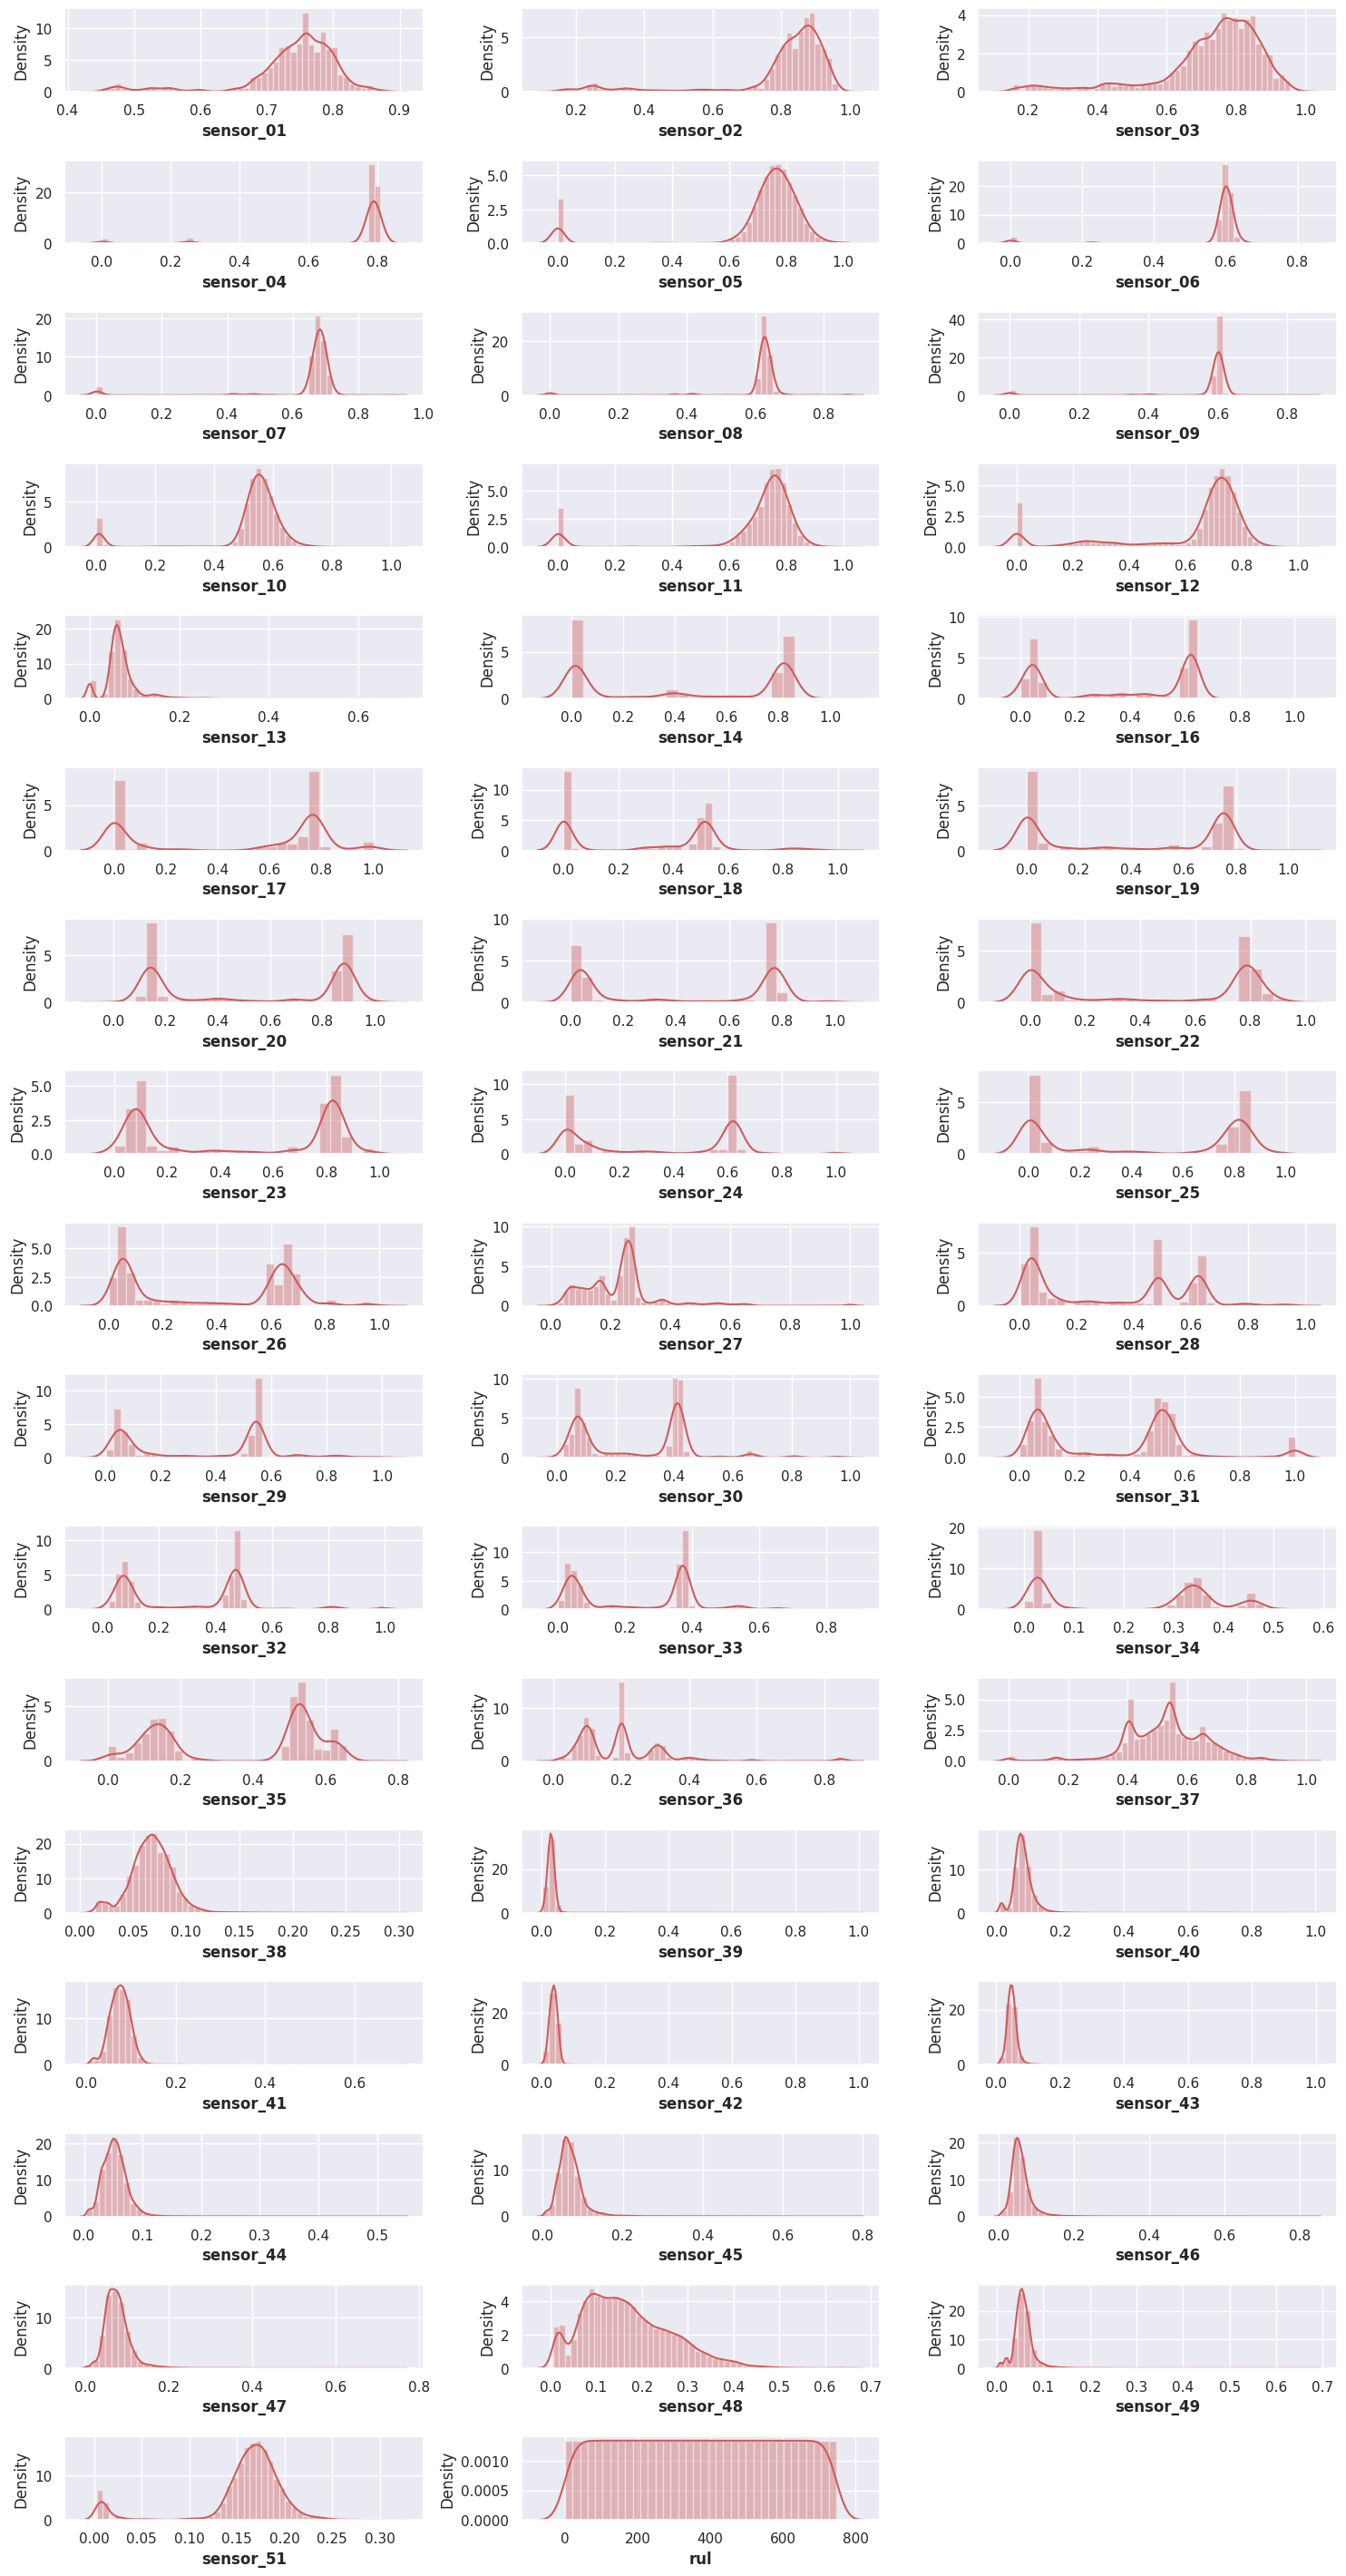

In [19]:
#findig distribution of features # let's have a look at the distribution first 50 sensors of

plt.figure(figsize=(15, 100))

for i, col in enumerate(df.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

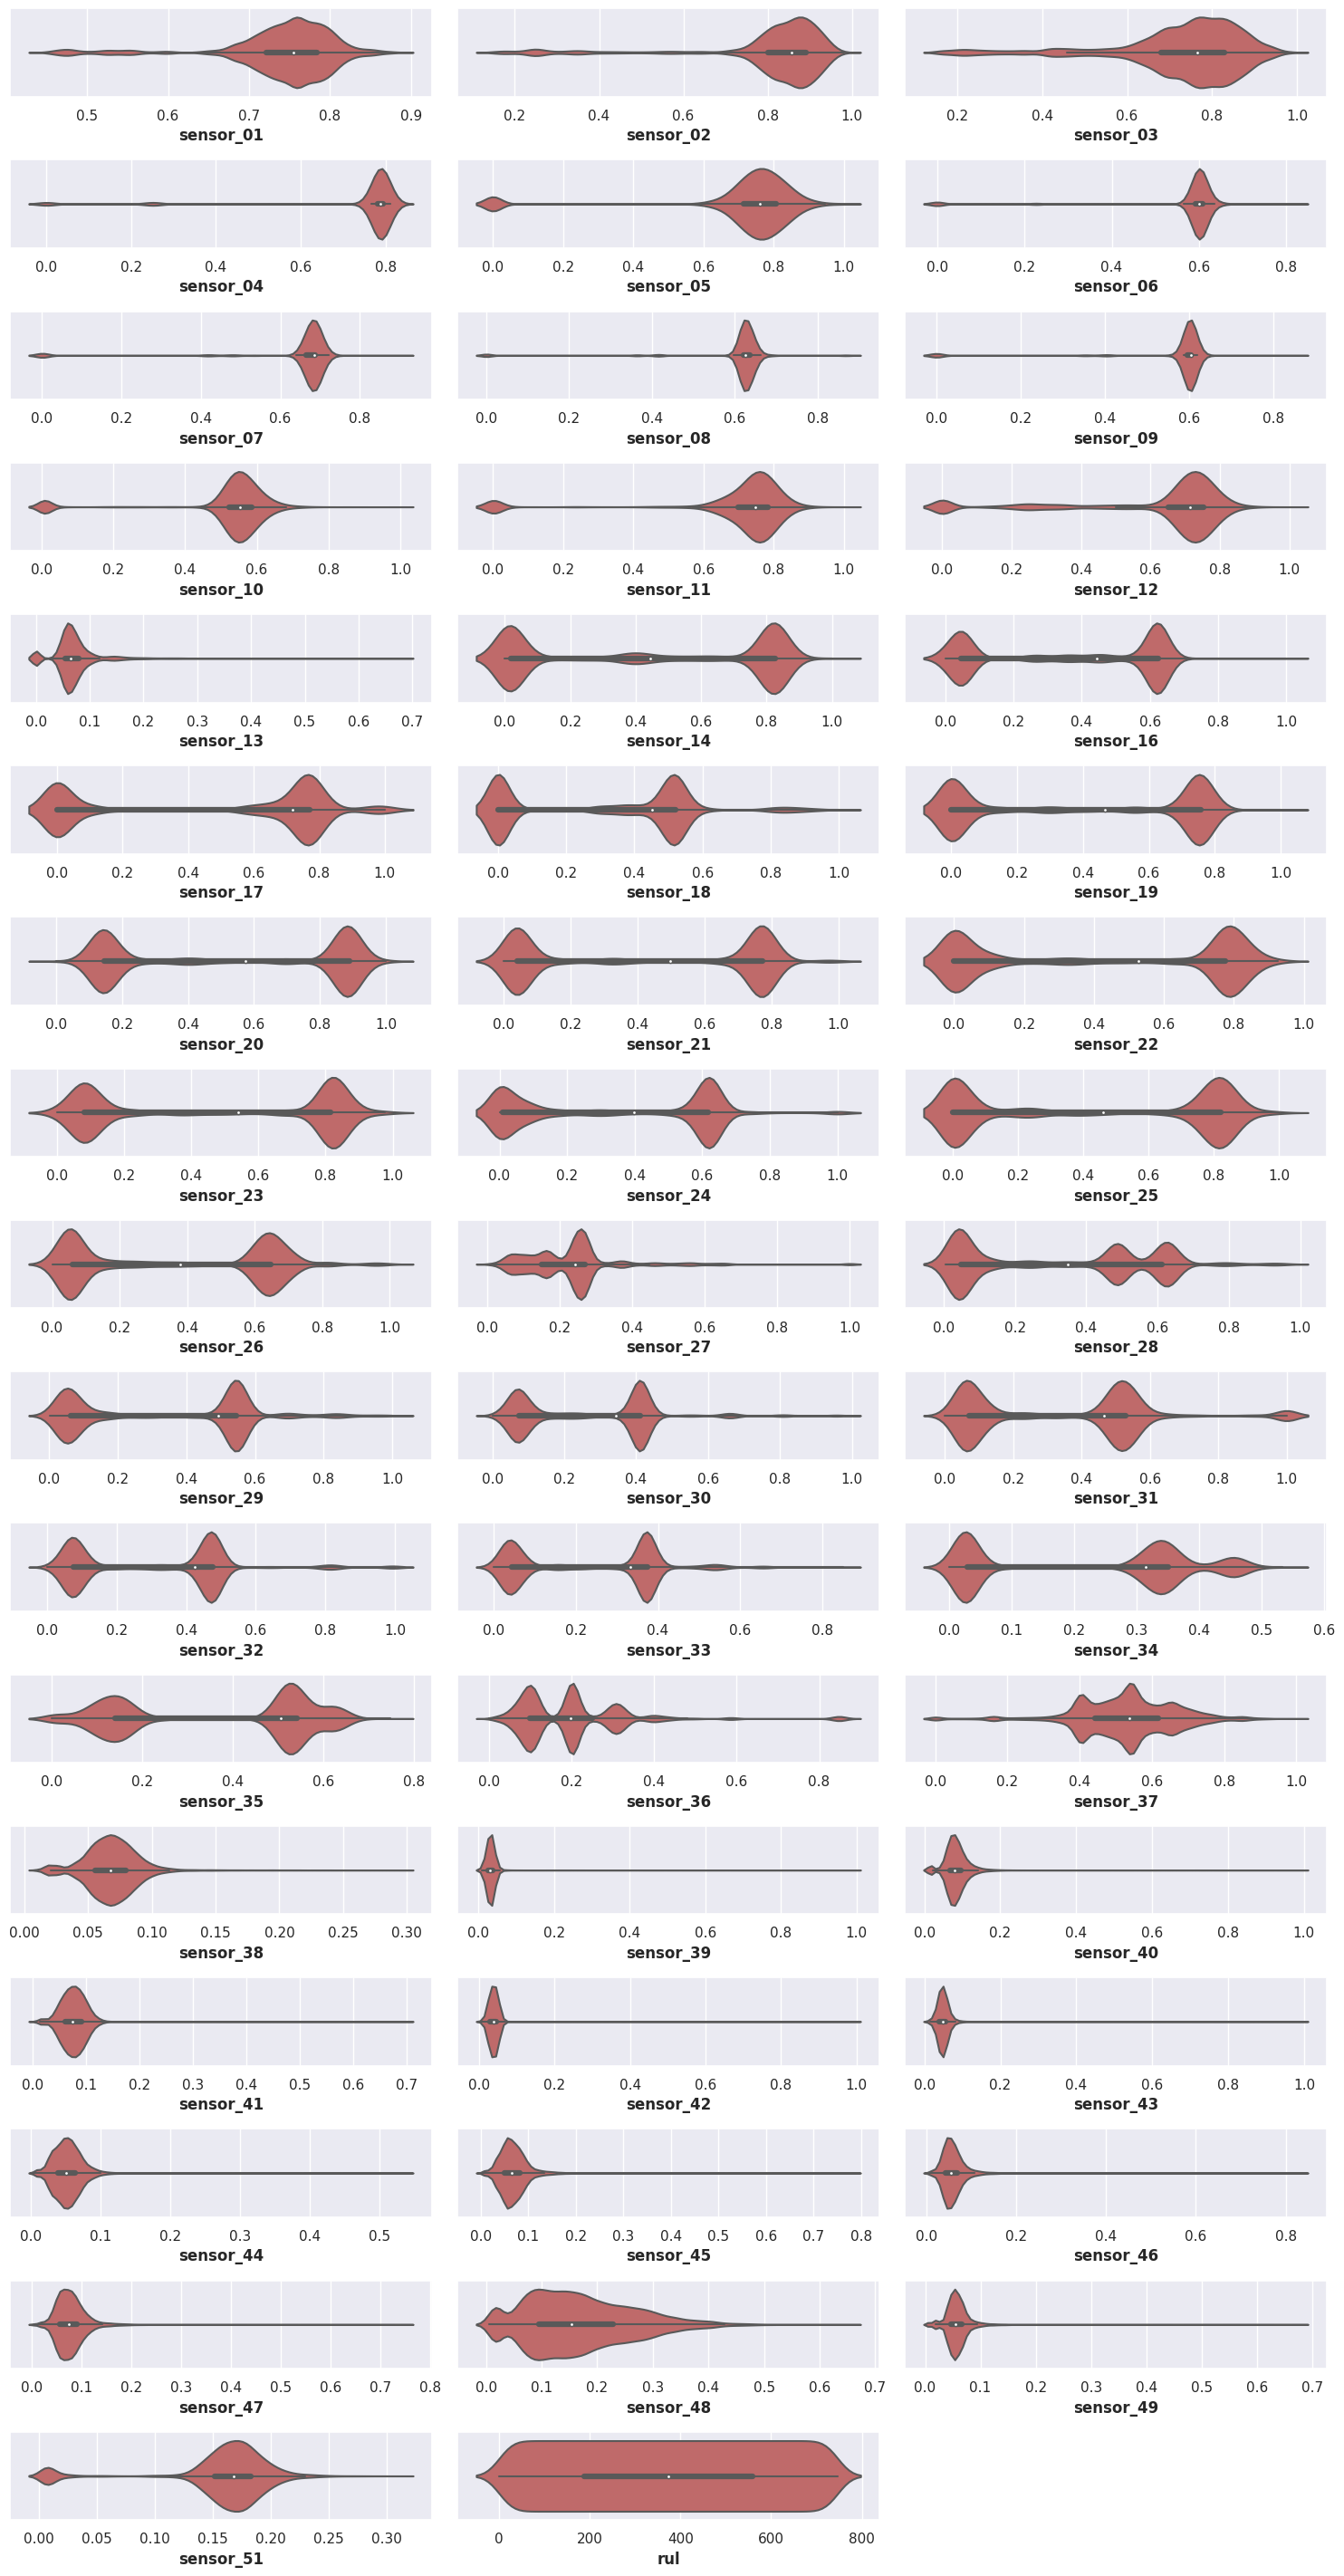

In [20]:
#getting frequency of data
plt.figure(figsize=(15, 100))

for i, col in enumerate(df.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.violinplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

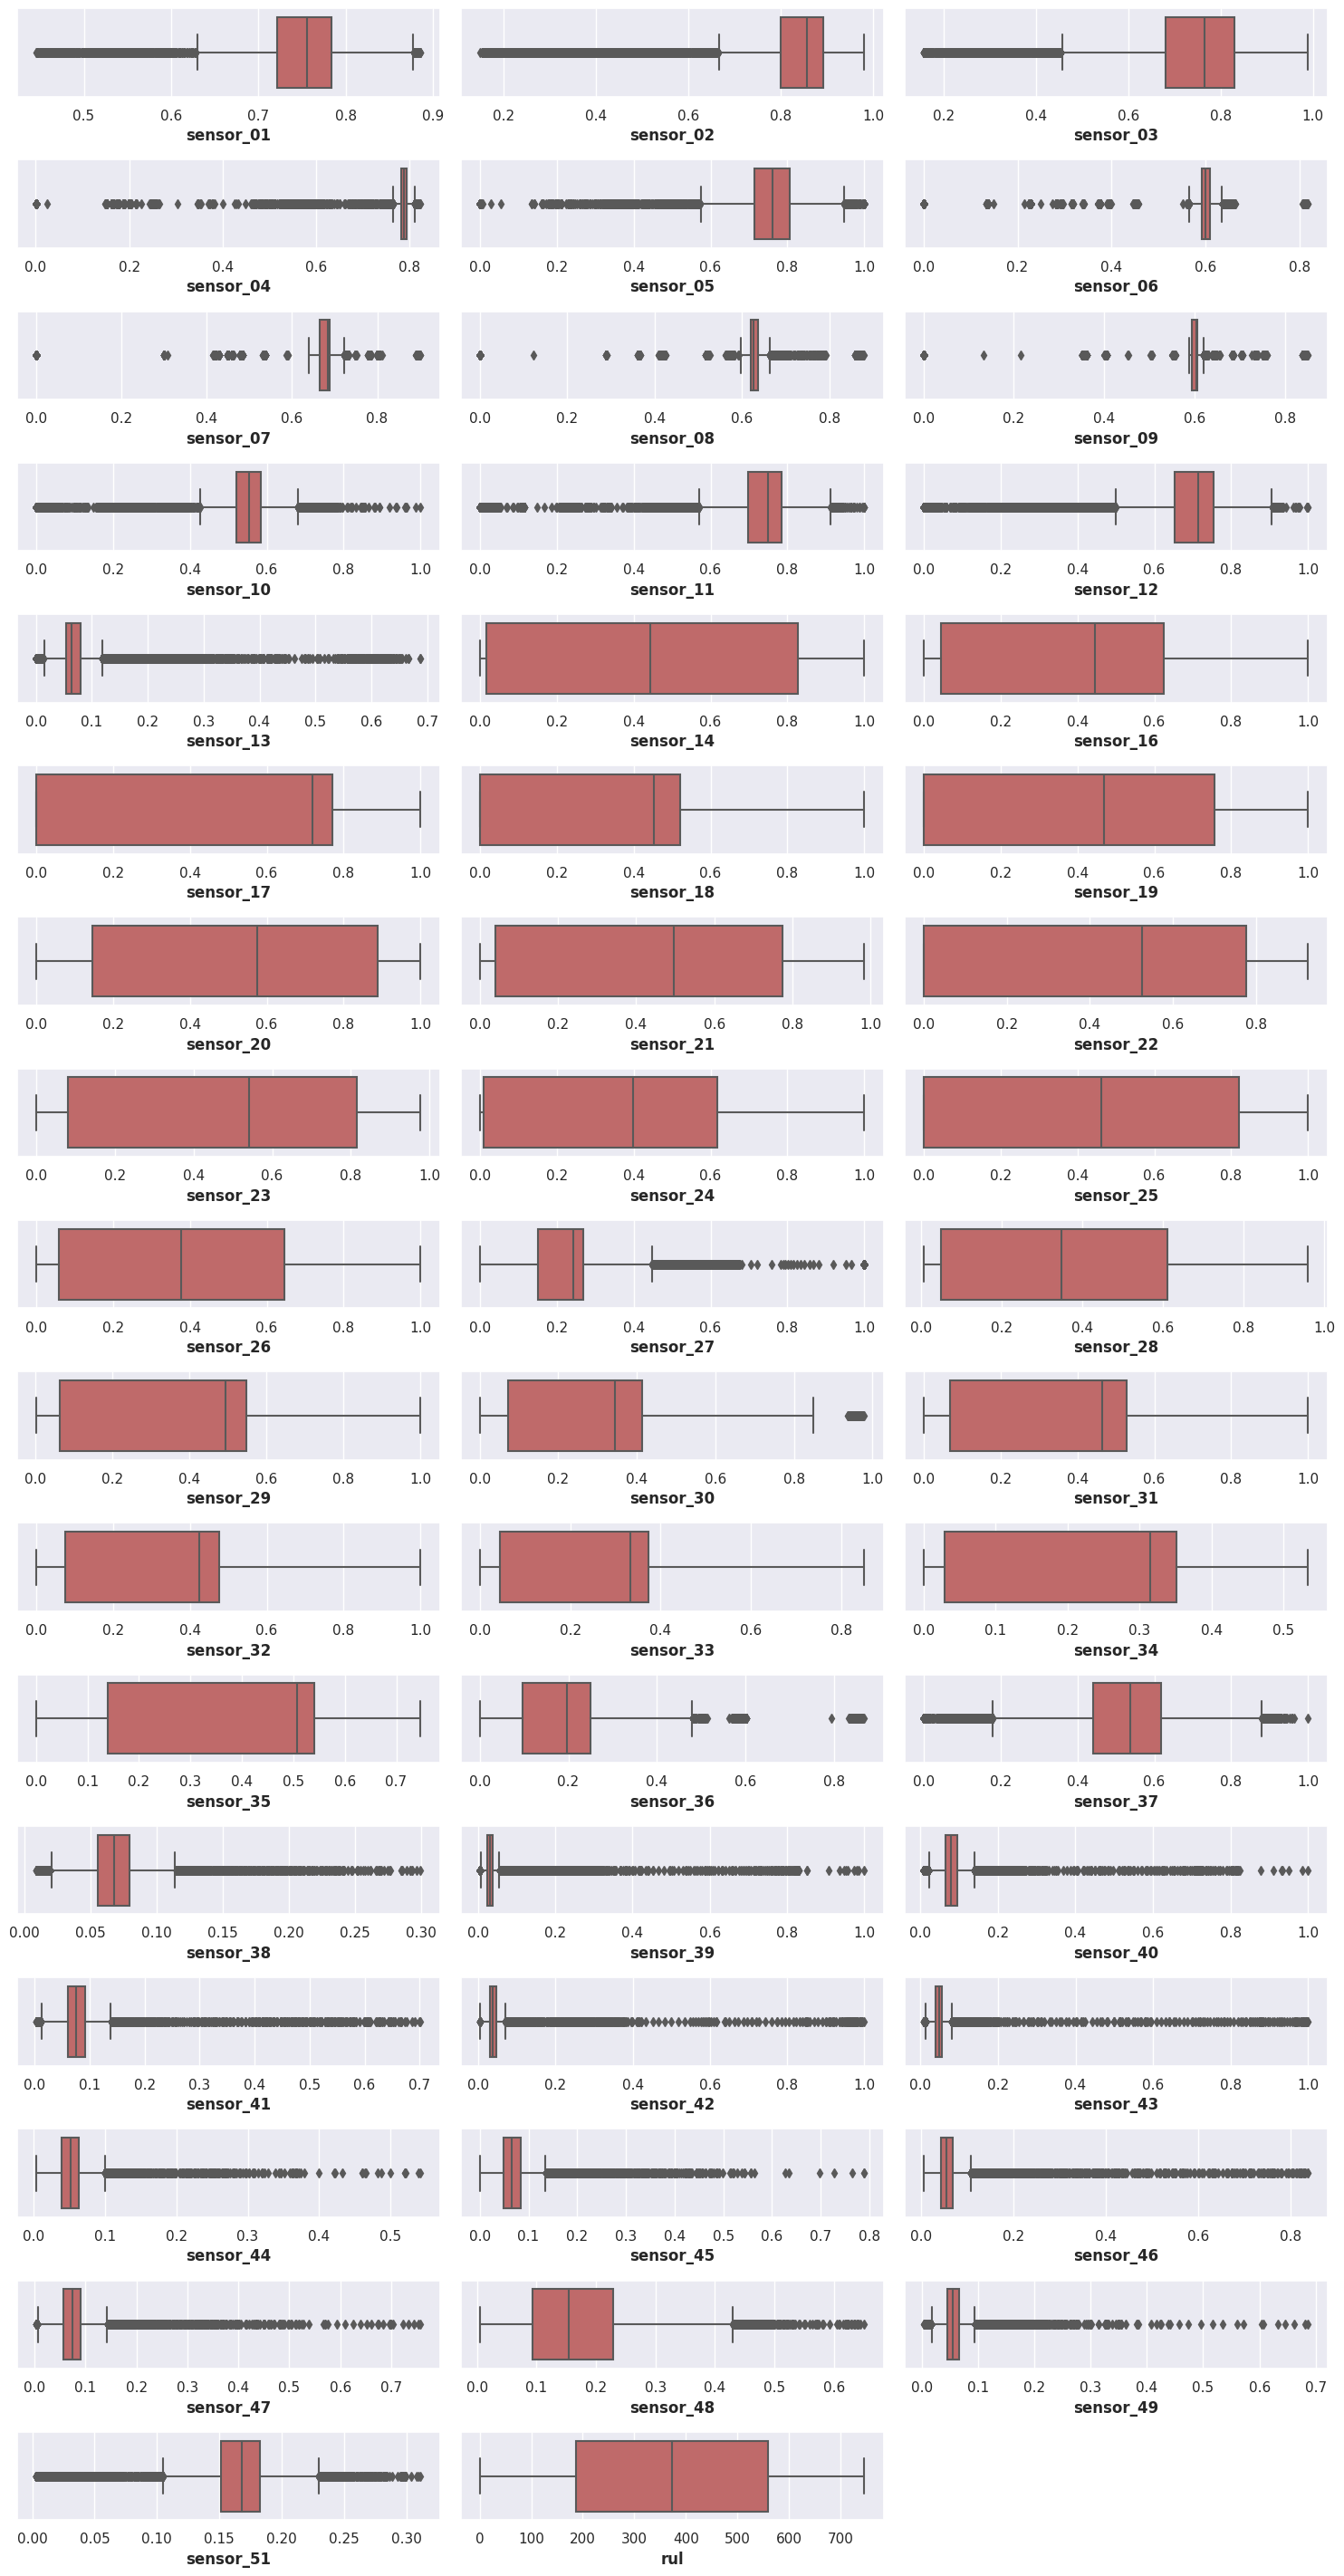

In [24]:
#getting frequency of data
plt.figure(figsize=(15, 100))

for i, col in enumerate(df.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.boxplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [26]:
numeric_features = df.select_dtypes(exclude="object").columns
print(numeric_features)

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_51', 'rul'],
      dtype='object')


In [36]:
# saprate dependent and indipendrnt features
x = df.drop('rul',axis=1)
y = df['rul']
print(x.shape)
print(y.shape)

(44807, 50)
(44807,)


In [37]:
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [42]:
from sklearn.model_selection import train_test_split

# Assuming 'rul' is in the original DataFrame
x = df.drop('rul', axis=1)
y = df['rul']

# Create num pipeline
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", RobustScaler())
    ]
)

# Preprocessor
preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, x.columns)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Transform data using the preprocessor object
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [44]:
X_train_transformed.shape

(35845, 50)

In [45]:
X_test_transformed.shape

(8962, 50)

In [48]:
!pip install keras-tuner

In [58]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
import keras_tuner as kt
from tensorflow.keras.metrics import MeanSquaredError

In [59]:
def build_model(hp):
    model = Sequential()

    counter = 0

    for i in range(hp.Int("num_layer", min_value=8, max_value=25)):
        if counter == 0:
            model.add(Dense(hp.Int("neuron"+str(i), min_value=8, max_value=200, step=8),
                            activation=hp.Choice("activation"+str(i), values=["elu", "leaky_relu"]),
                            kernel_initializer=hp.Choice("initializer"+str(i), values=["glorot_uniform", "he_normal"]),
                            input_dim=50))
        else:
            model.add(Dense(hp.Int("neuron"+str(i), min_value=8, max_value=200, step=8),
                            activation=hp.Choice("activation"+str(i), values=["elu", "leaky_relu"]),
                            kernel_initializer=hp.Choice("initializer"+str(i), values=["glorot_uniform", "he_normal"])))

            # Add dropout after each dense layer
            dropout_rate = hp.Float("dropout_rate" + str(i), min_value=0.0, max_value=0.9, step=0.1)
            model.add(Dropout(rate=dropout_rate))

            # Add Batch Normalization after each hidden layer
            model.add(BatchNormalization())

        counter += 1

    model.add(Dense(1, activation="linear"))  # Output layer for regression with 1 neuron and linear activation

    OPTIMIZER = hp.Choice("optimizer", values=["rmsprop", "adam"])
    # Use hp.Choice to select learning rate
    # learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-1, sampling="log")
    LOSS_FUNCTION = "mean_squared_error"  # Use MSE for regression
    METRICS = ["mae","mse"]  # You can add other metrics like Mean Absolute Error (MAE) if needed
    model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

    return model


In [60]:
tuner = kt.RandomSearch(
    build_model,
    objective="val_mse",  # Use "mse" as the objective for regression
    max_trials=3,
    directory="mydir"
)

Reloading Tuner from mydir/untitled_project/tuner0.json


In [61]:
tuner.search(X_train_transformed,y_train,epochs=5,validation_data=(X_test_transformed,y_test))

Trial 3 Complete [00h 02m 17s]
val_mse: 13544.626953125

Best val_mse So Far: 13544.626953125
Total elapsed time: 00h 14m 31s


In [62]:
tuner.get_best_hyperparameters()[0].values

{'num_layer': 21,
 'neuron0': 136,
 'activation0': 'leaky_relu',
 'initializer0': 'he_normal',
 'neuron1': 120,
 'activation1': 'elu',
 'initializer1': 'he_normal',
 'dropout_rate1': 0.0,
 'neuron2': 192,
 'activation2': 'leaky_relu',
 'initializer2': 'he_normal',
 'dropout_rate2': 0.7000000000000001,
 'neuron3': 112,
 'activation3': 'elu',
 'initializer3': 'glorot_uniform',
 'dropout_rate3': 0.4,
 'neuron4': 64,
 'activation4': 'leaky_relu',
 'initializer4': 'he_normal',
 'dropout_rate4': 0.0,
 'neuron5': 112,
 'activation5': 'elu',
 'initializer5': 'glorot_uniform',
 'dropout_rate5': 0.0,
 'neuron6': 128,
 'activation6': 'elu',
 'initializer6': 'he_normal',
 'dropout_rate6': 0.5,
 'neuron7': 88,
 'activation7': 'leaky_relu',
 'initializer7': 'glorot_uniform',
 'dropout_rate7': 0.30000000000000004,
 'optimizer': 'rmsprop',
 'neuron8': 200,
 'activation8': 'elu',
 'initializer8': 'he_normal',
 'dropout_rate8': 0.5,
 'neuron9': 72,
 'activation9': 'leaky_relu',
 'initializer9': 'he_norm

In [63]:
model = tuner.get_best_models(num_models=1)[0]


In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 136)               6936      
                                                                 
 dense_1 (Dense)             (None, 120)               16440     
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 batch_normalization (Batch  (None, 120)               480       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 192)               23232     
                                                                 
 dropout_1 (Dropout)         (None, 192)               0         
                                                        

In [65]:
history = model.fit(X_train_transformed,y_train,epochs=6,initial_epoch=2,validation_data=(X_test_transformed,y_test))


Epoch 3/6
1121/1121 [==============================] - 41s 27ms/step - loss: 9199.9717 - mae: 76.0503 - mse: 9199.9717 - val_loss: 4693.2222 - val_mae: 57.9181 - val_mse: 4693.2222
Epoch 4/6
1121/1121 [==============================] - 26s 23ms/step - loss: 4685.0391 - mae: 49.7619 - mse: 4685.0391 - val_loss: 2126.8020 - val_mae: 37.3120 - val_mse: 2126.8020
Epoch 5/6
1121/1121 [==============================] - 25s 22ms/step - loss: 4471.6514 - mae: 48.9905 - mse: 4471.6514 - val_loss: 749.5085 - val_mae: 21.7977 - val_mse: 749.5085
Epoch 6/6
1121/1121 [==============================] - 25s 22ms/step - loss: 4405.5020 - mae: 48.6882 - mse: 4405.5020 - val_loss: 3866.7729 - val_mae: 26.3524 - val_mse: 3866.7729


In [67]:
pd.DataFrame(history.history)


,loss,mae,mse,val_loss,val_mae,val_mse
0,9199.971680,76.050278,9199.971680,4693.222168,57.918091,4693.222168
1,4685.039062,49.761925,4685.039062,2126.802002,37.311993,2126.802002
2,4471.651367,48.990532,4471.651367,749.508545,21.797739,749.508545
3,4405.501953,48.688213,4405.501953,3866.772949,26.352407,3866.772949


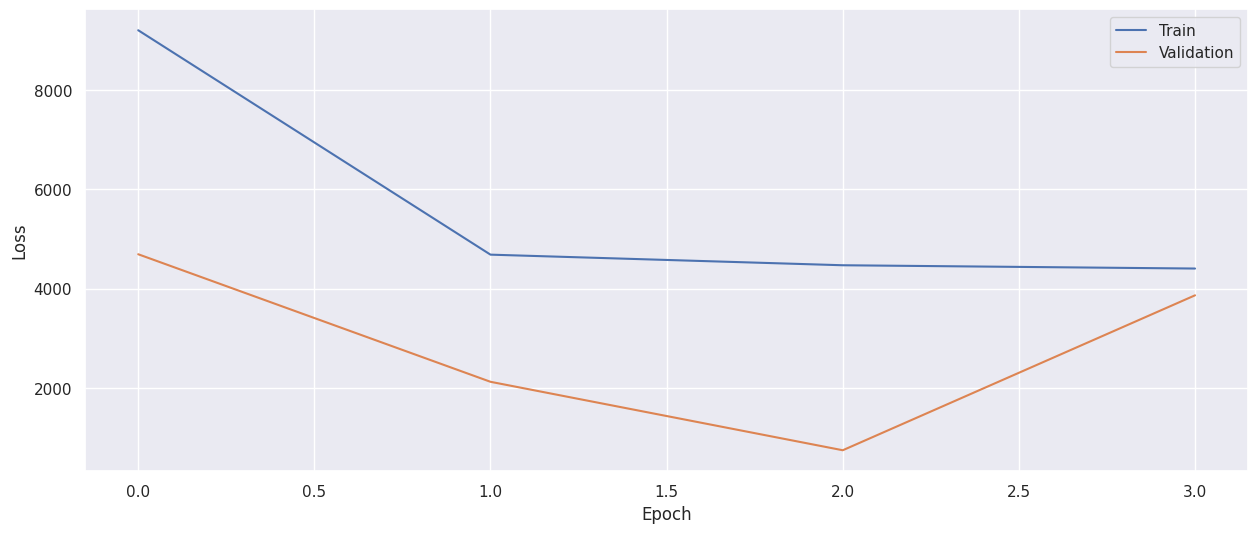

In [68]:
# Plot training loss
plt.plot(history.history["loss"], label="Train")

# Plot validation loss
plt.plot(history.history["val_loss"], label="Validation")

# Add labels and legend
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Show the plot
plt.show()


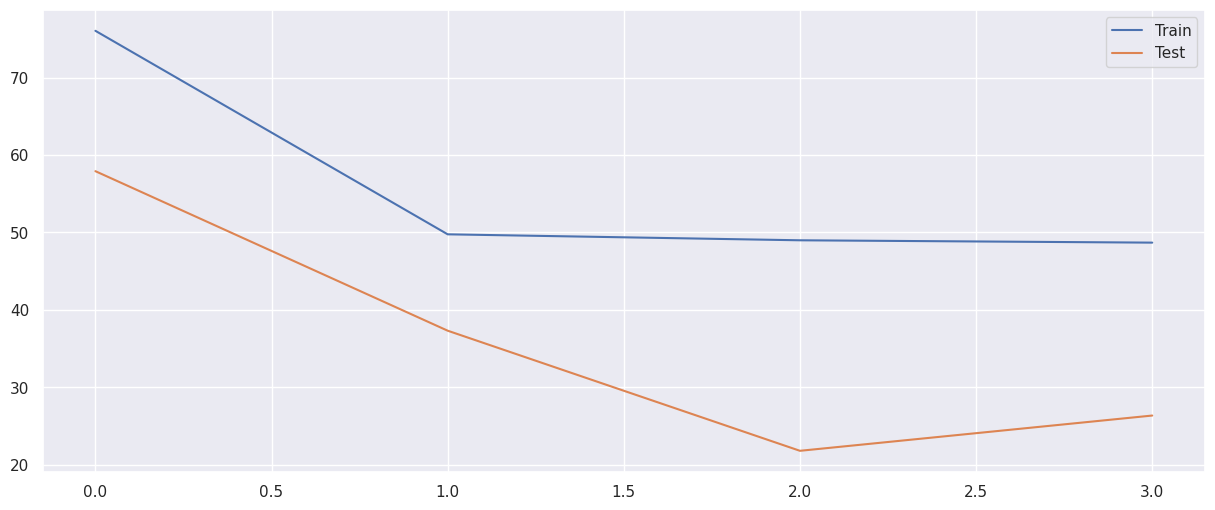

In [69]:
plt.plot(history.history["mae"],label="Train")
plt.plot(history.history["val_mae"],label="Test")
plt.legend()
plt.show()